(nb_prandtl_model)=

# Glacier wind

Katabatic flow associated with the stable boundary layer (SBL) often develop above glacier when advection of warm air over the much cooler glacier surface leads to a strong stratification and downward directed buoyancy flux. The permanent cold glacier surface produces a shallow cold air layer above the ground, which drains down the slopes following the local topography. The development of persistent shallow (5-100 m) downslope winds above glaciers are a well known phenomena and commonly referred to as glacier wind. The characteristic and intensity of the glacier wind is governed by the interplay of buoyancy, surface friction and entrainment at the upper boundary of the SBL. Near the surface the wind is usually calm and the wind velocity gradually increases with height, frequently forming a pronounced low-level jet (LLJ). Above the LLJ winds gradually changes to geostrophic.

In alpine regions, well developed glacier winds often show a wind maximum in the lowest 1-10 meters above the surface. Usually the strongest winds occur during the warmest air temperatures. The observations imply that there is a correlation between the height and strength of the katabatic wind - the stronger the jet, the higher the maximum. Furthermore, the height of the beam shows a dependence on the slope. The steeper the terrain, the lower the maximum.

<div class="alert alert-block alert-success">
<b>Learning objectives:</b><br>
<ul>
 <li>A basic understanding of glacier winds</li>
 <li>Steady-state Prandtl model for glacier wind</li>
</ul>  
</div>

<div class="alert alert-block alert-info">
<b>Prerequisites</b><br>
<ul>
<li>Basic knowledge of Python, Jupyter Notebooks, and data analysis</li>
<li>Familiarity with Scipy, Pandas, Xarray, and Plotly</li>
</ul>  
</div>

# Theoretical background

More information about glacier winds and the Prandtl model can be found in <a href="https://box.hu-berlin.de/f/cf005d8f5ac34be698f7/" download>Oerlemans (2010)</a>


The Navier-Stokes equations describes the motion of fluids. For shallow steady-state katabatic flow we can simplify these equations by using the Boussinesq approximation and assuming a hydrostatic equilibrium. Furthermore, we assume that friction balances the acceleration by buoyancy forcing. Thus, the first-order momentum and heat budgets can be written as

$$
\frac{g \cdot sin(\eta)}{T_0}\theta = \frac{\partial F_u}{\partial z}
$$ 

$$
-\gamma_{\theta} \cdot sin(\eta) \cdot u = \frac{\partial F_{\theta}}{\partial z}
$$ 

with $g$ the gravitational acceleration, $T_0$ the characteristic temperature, $F_u$ the turbulent momentum flux, $F_{\theta}$ the turbulent heat flux, $z$ the height above the ground, $u$ the wind speed, $\theta$ the potential temperature, and $\eta$ the glacier slope. To close the equation we parametrize the momentum and heat flux with simple K-theory:

$$
F_u = -K_m \frac{du}{dz}, F_{\theta} = -K_h \frac{d\theta}{dz}.
$$ 

The two constants $K_h$ and $K_h$ are the eddy diffusivities for momentum and heat. Pluggin these equations into Eq.{eq}`momentum` and {eq}`heat` we obtain:

$$
\frac{g \cdot sin(\eta)}{T_0} \theta + \frac{d}{dz}\left(K_m \frac{du}{dz}\right) = 0.
$$ 

$$
-\gamma_{\theta} \cdot sin(\eta) \cdot u + \frac{d}{dz}\left(K_h \frac{d\theta}{dz}\right) = 0.
$$ 

To sake of simplicity we also write $s=-sin(\eta) ~ (>0)$. Prandtl (1942) solved these equation to understand thermally induced slope flows. The final equation can be written as:

$$
K_m \frac{d^2 u}{dz^2} - \frac{g \cdot s}{T_0} \theta = 0.
$$ 

$$
K_h \frac{d^2 \theta}{dz^2} - \gamma_{\theta} \cdot s \cdot u = 0.
$$ 

This set of equation form a system of homogeneous linear differential equations of fourth order.
The general solution can be found using a linear combination of the fundamental basis function

$$
u(z) = \sum_{i=1}^{4} a_i e^{\lambda_i z}, \theta(z) = \sum_{i=1}^{4} a_i e^{\lambda_i z}.
$$ 

The constants and $a_i$ and the the eigenvalue $\lambda_i$ are both complex. Using the following boundary condition:

$$
u(z=0, z \rightarrow \inf) = 0,
$$ 

$$
\theta(z \rightarrow \inf) = 0, \theta(z=0)=C,
$$ 

we find the general solutions.


<div class="alert alert-block alert-info">
<b><h1>Analytical Prandtl-Model</h1></b><br>
    
The equations that fullfills the conditions are

$$
\theta(z) = C \exp^{-z/\lambda} \cos(z/\lambda)
$$ 

$$
u(z) = C \mu \exp^{-z/\lambda} \sin(z/\lambda)
$$ 

with

$$
\lambda=\left(\frac{4 \cdot T_0 \cdot K_m \cdot K_h}{g \cdot s^2 \cdot \gamma_{theta}}\right)^{\frac{1}{4}}
$$ 

$$
\mu = \left( \frac{g \cdot K_h}{T_0 \cdot K_m \cdot \gamma_{\theta}}\right)^{\frac{1}{2}}
$$ 
    
</div>

Before we solve the equations for the wind and the temperature we define the necessary parameters

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Km = 0.1       # turbulent diffusivity for momentum
Kh = 0.02      # turbulent diffusivity for heat
g  = 9.81      # gravitational acceleration
lapse = 0.004  # lapse rate
s = -5         # surface slope
s = np.sin(s*3.14/180) 
C = -11        # temperature perturbation [ºC]
T0 = 280       # reference temperature [K]
zmax = 50      # maximal height [m]

With these parameters the natural length scale of the flow and the temperature can be calculated

In [4]:
# Natural length scales
# for momentum
lam = ((4*T0*Km*Kh)/(g*s**2*lapse))**(0.25)
# and heat
mu = ((g*Kh)/(T0*Km*lapse))**(0.5)

Afterwards the profiles can be calculated

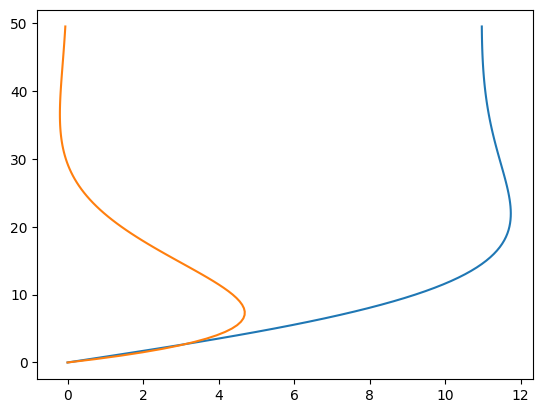

In [10]:
# temperature profile
theta = [C*np.exp(-z/lam)*np.cos(z/lam) for z in np.arange(0,zmax,0.5)]

# wind profile
u = [C*mu*np.exp(-z/lam)*np.sin(-z/lam) for z in np.arange(0,zmax,0.5)]

# Plot both profiles
plt.plot(np.array(theta1)+11,np.arange(0,zmax,0.5))
plt.plot(np.array(u1),np.arange(0,zmax,0.5))

In [ ]:
z_meas = [0.2,0.5,1,2,4,6,8,13]
u_meas = [3,3.2,3.8,4.2,4.3,4.4,4.3,3.9]
t_meas = [3.8,4.0,4.4,5.2,7.1,9,9.7,10]

lam = ((4*T0*Km*Kh)/(g*s**2*lapse))**(0.25)
mu = ((g*Kh)/(T0*Km*lapse))**(0.5)

theta1 = [C*np.exp(-z/lam)*np.cos(z/lam) for z in np.arange(0,zmax,0.5)]
u1 = [C*mu*np.exp(-z/lam)*np.sin(-z/lam) for z in np.arange(0,zmax,0.5)]

lam2 = ((g*s**2*lapse)/(4*T0*Km*Kh))**(0.25)
theta2 = [C*np.exp(-z*lam2)*np.cos(z*lam2) for z in np.arange(0,zmax,0.5)]
u2 = [C*np.exp(-z*lam2)*np.sin(z*lam2) for z in np.arange(0,zmax,0.5)]

#plt.plot(np.array(theta1)+11,np.arange(0,zmax,0.5))
#plt.plot(np.array(u1),np.arange(0,zmax,0.5))

#plt.plot(np.array(u_meas),np.array(z_meas))
#plt.plot(np.array(t_meas),np.array(z_meas))
plt.plot(np.array(theta2)/-C,np.arange(0,zmax,0.5))
plt.plot(np.array(u2)/(mu*C),np.arange(0,zmax,0.5))